### SPAC Commons and Warrant Prices

The aim of this work is to predict how much a SPAC warrant will be priced as compared to its common share. This is done taking the May 8th market price of a few dozen SPACs and plotting them. A linear regression calculation fits a line between all samples to reveal the trend. 

All price samples are documented in `prices.csv` spreadsheet.

It's important to remind ourselves that "Past performance is no guarantee of future results." That said, we can use this data analysis to inform price-targets as we grow and maintain our portfolio.

_NOTE:_ Another goal of mine in making this is a practical application of machine learning R&D. This is simple, but it's useful!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from matplotlib.dates import DateFormatter
from datetime import datetime, date, time, timedelta

In [2]:
%matplotlib inline

Read in the spreadsheet recording stock ticker symbols, commons price, and warrants price.

In [3]:
stock_price_data = pd.read_csv("./prices.csv", sep=",")

Debug: print the **last few rows** of the stock price data to simply inspect the spreadsheet

In [4]:
stock_price_data.tail(7)

,ticker,commons_price,warrant_price
25,srng,10.07,2.30
26,sspk,15.92,5.22
27,tekk,9.90,1.02
28,thcb,12.12,3.00
29,tpgy,15.46,5.01
30,vgac,9.95,1.45
31,vygg,10.00,2.06


Find the **lowest cost** warrant and print out that row of pricing data.

In [5]:
min_cost_row_index = stock_price_data.warrant_price.idxmin()
print(stock_price_data.iloc[min_cost_row_index])

ticker           gnrs
commons_price      10
warrant_price    0.71
Name: 13, dtype: object


Find the **highest cost** warrant and print out that row of pricing data.

In [6]:
max_cost_row_index = stock_price_data.warrant_price.idxmax()
print(stock_price_data.iloc[max_cost_row_index])

ticker            chpt
commons_price    22.63
warrant_price    11.11
Name: 5, dtype: object


Find the **Top-10 most expensive** warrants and print out their rows of pricing data.

In [7]:
stock_price_expense_sorted = stock_price_data.sort_values("warrant_price", ascending = False)
stock_price_expense_sorted.head(10)

,ticker,commons_price,warrant_price
5,chpt,22.63,11.11
4,cciv,19.33,8.37
17,muds,16.54,6.60
2,arvl,18.52,6.24
16,ipoe,16.65,5.32
26,sspk,15.92,5.22
18,nga,16.17,5.03
29,tpgy,15.46,5.01
0,actc,15.58,4.45
7,cmlf,12.07,3.77


Render a graph showing the stock price of its warrants as compared to its commons. Data sample is from May 8th 2021. Let's get a feel of how SPAC prices **relate** to one another. 

Look for the red line. It's a linear regression solution showing the best-fit curve between all known sample points. We can estimate a _warrants_ price for any _commons_ price according to that line.

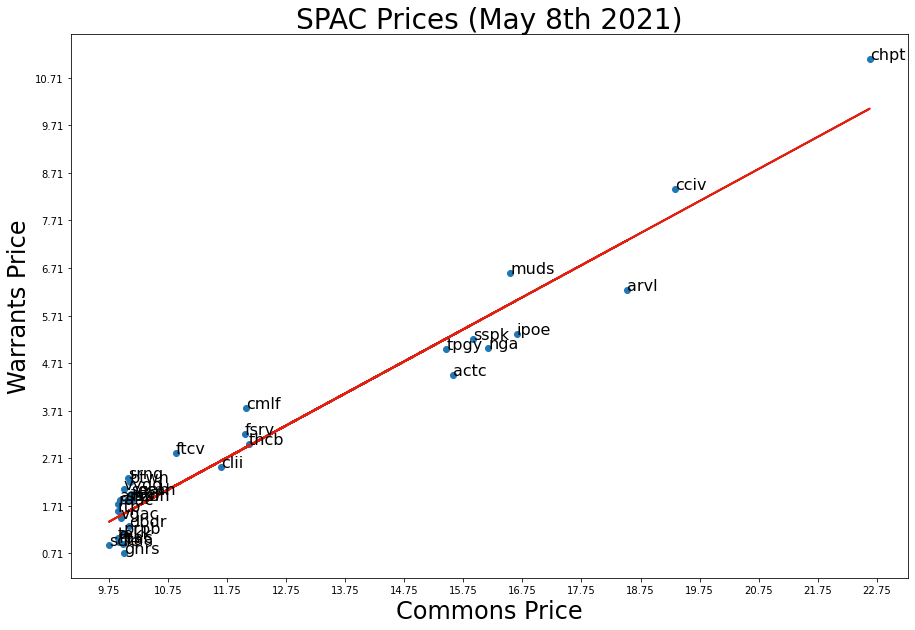

In [8]:
x = stock_price_data.commons_price
y = stock_price_data.warrant_price

plt.figure(figsize=(15,10))
plt.title('SPAC Prices (May 8th 2021)', fontsize = 28)
plt.xlabel('Commons Price', fontsize = 24)
plt.ylabel('Warrants Price', fontsize = 24)
plt.xticks(np.arange(min(x), max(x) + 1, 1.0))
plt.yticks(np.arange(min(y), max(y) + 1, 1.0))

stats = linregress(x, y)
m = stats.slope
b = stats.intercept
plt.plot(x, m * x + b, color = "#E02010", linewidth = 2)

plt.scatter(x, y)

for i, label in enumerate(stock_price_data.ticker):
    plt.annotate(label, (x[i], y[i]), fontsize = 16)

plt.show()


Use a Linear Regression algorithm from the SKLearn library training it on the given stock price data. This is crucial because we can estimate any warrants price resulting from the commons price. 

_Note:_ Your most valuable part of this project is found when you leverage the input area below to exercise the trained model.

In [9]:
warrants_model = LinearRegression()

commons_x_train = np.array(x).reshape((-1, 1))
warrants_y_train = np.array(y).reshape((-1, 1))

warrants_model.fit(commons_x_train, warrants_y_train)

LinearRegression()

**Best Value** of this project is setting the `commons_target_price` variable below, and re-running that code section. See the final _output_ below of `warrants_predicted_price`.

In [11]:
commons_target_price = 18.52
warrants_predicted_price = warrants_model.predict([[commons_target_price]])

print(f"commons price[{commons_target_price}] will produce warrants price [{warrants_predicted_price[0][0]}]")

commons price[18.52] will produce warrants price [7.289604207782276]
